
# K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN) is based on the principle of similarity, where the classification or prediction of a data point is determined by the majority class or average of its nearest neighbors in the feature space.

## How KNN Works
1. **Data Representation**: Each data point is represented as a feature vector.
2. **Distance Calculation**: The distance between the query point and all other points in the dataset is calculated using a distance metric (e.g., Euclidean, Manhattan, or Minkowski distance). In this case we desing a euclidian distance function, but others could be declared and passed on to the KNN class.
3. **Neighbor Selection**: The `k` nearest neighbors to the query point are identified based on the calculated distances.
4. **Prediction**:
    - For classification, the majority class among the `k` neighbors is assigned to the query point.
    - For regression, the average of the values of the `k` neighbors is used as the prediction.

## Key Parameters
- **k (Number of Neighbors)**: Determines the number of neighbors to consider. A small `k` may lead to overfitting, while a large `k` may oversmooth the decision boundary.
- **Distance Metric**: Defines how the distance between points is measured. Common metrics include:
  - Euclidean Distance: $ \sqrt{\sum (x_i - y_i)^2} $
  - Manhattan Distance: $ \sum |x_i - y_i| $

## Advantages
- Simple to implement and understand.
- No assumptions about the underlying data distribution.
- Effective for small datasets with well-separated classes.

## Disadvantages
- Computationally expensive for large datasets due to the need to calculate distances for all points.
- Sensitive to the choice of `k` and the distance metric.
- Performance can degrade with high-dimensional data (curse of dimensionality).


In [19]:
# this section adds the package path to the system path so it can be used here
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))


import mltoolbox as ml # my module

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [20]:
# Load the CSV file into a pandas DataFrame
D = pd.read_csv('../../Datasets/seeds_dataset.csv', delimiter=r'\s+', names=[
    'area',
    'perimeter', 
    'compactness', 
    'length_of_kernel', 
    'width_of_kernel', 
    'asymmetry', 
    'length_of_kernel_groove', 
    'class'])


# so our lable is the class column,
y = D['class'].to_numpy()
X = D[['area', 'asymmetry']].values


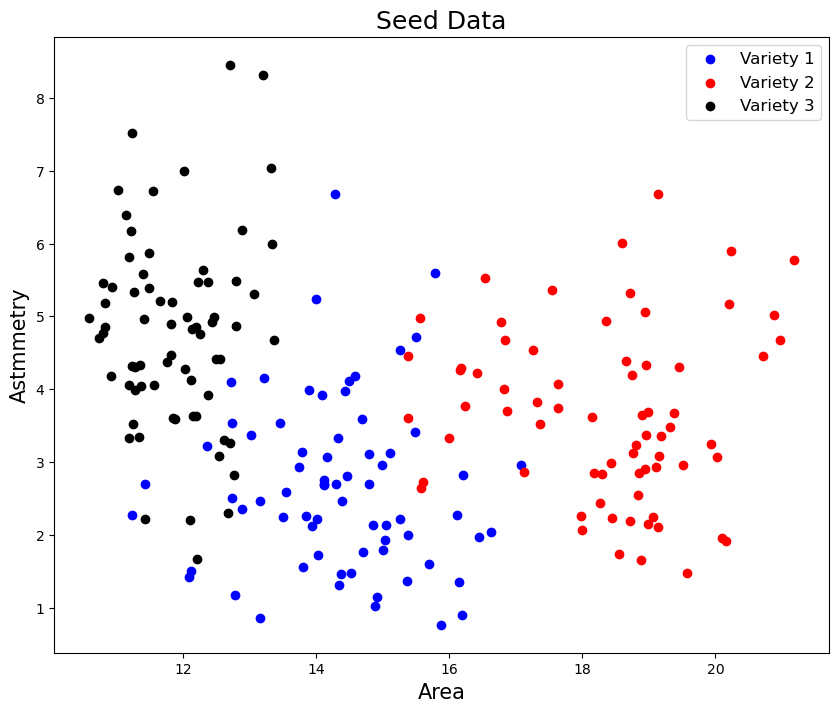

In [21]:
plt.figure(figsize=(10, 8))
plt.title("Seed Data", fontsize=18)
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='Variety 1')
plt.scatter(X[y == 2, 0], X[y == 2, 1], c='red', label='Variety 2')
plt.scatter(X[y == 3, 0], X[y == 3, 1], c='black', label='Variety 3')
plt.xlabel("Area", fontsize=15)
plt.ylabel("Astmmetry", fontsize=15)
plt.legend(fontsize=12)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

k = 5 

In [23]:
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

print(f"The distance between point 10 and 67 is {distance(X[10], X[67])}")

The distance between point 10 and 67 is 2.640601446640519


In [ ]:
k_obj = ml.KNN(X_train,y_train,distance) ## making our class object

# Test our function
print(f"The classification error for k={k} is {k_obj.classification_error(X_test, y_test, k)}")

The classification error for k=5 is 0.09523809523809523


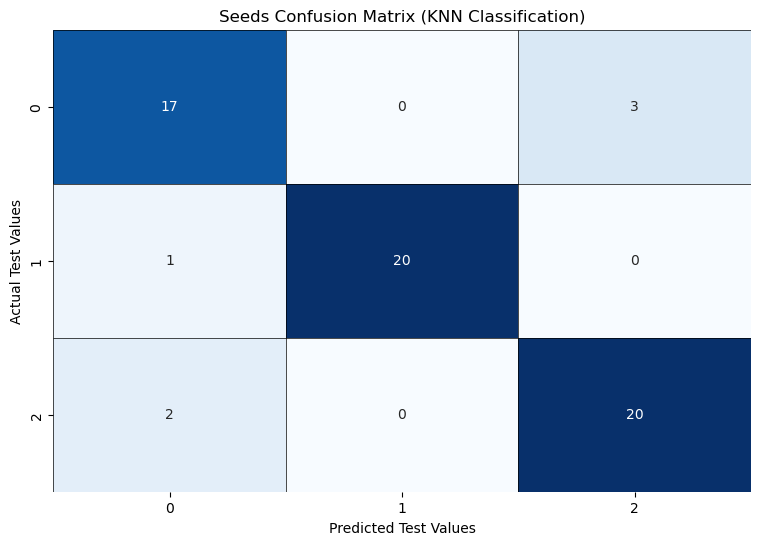

In [25]:
# Plot the Confusion Matrix
prediction = [k_obj.KNN_Predict(X_test[i], k) for i in range(len(X_test))]

cf_matrix = confusion_matrix(y_test, prediction)

plt.figure(figsize = (9, 6))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)

ax.set_title('Seeds Confusion Matrix (KNN Classification)')
ax.set_xlabel('Predicted Test Values')
ax.set_ylabel('Actual Test Values')

# Draw grid lines using a different approach
for i in range(4):
    ax.hlines(y=i, xmin=0, xmax=3, color='black', linewidth=0.5)

for j in range(4):
    ax.vlines(x=j, ymin=0, ymax=3, color='black', linewidth=0.5)

plt.show()

# Selecting the Optimal k-value

We can test the classification error for many k-values and compare their classification error. For this __Seeds__ dataset there are two groups of "good" k-values. The low values like 3 & 5, and the higher values like 16, 18, & 20. In general, higher values are better since they lead to more smoothing of the classification groups and are less suseptible to overfitting.

In [26]:
possible_k = [k for k in range(3, 26, 1)]
errors = [k_obj.classification_error(X_test, y_test, k) for k in possible_k]

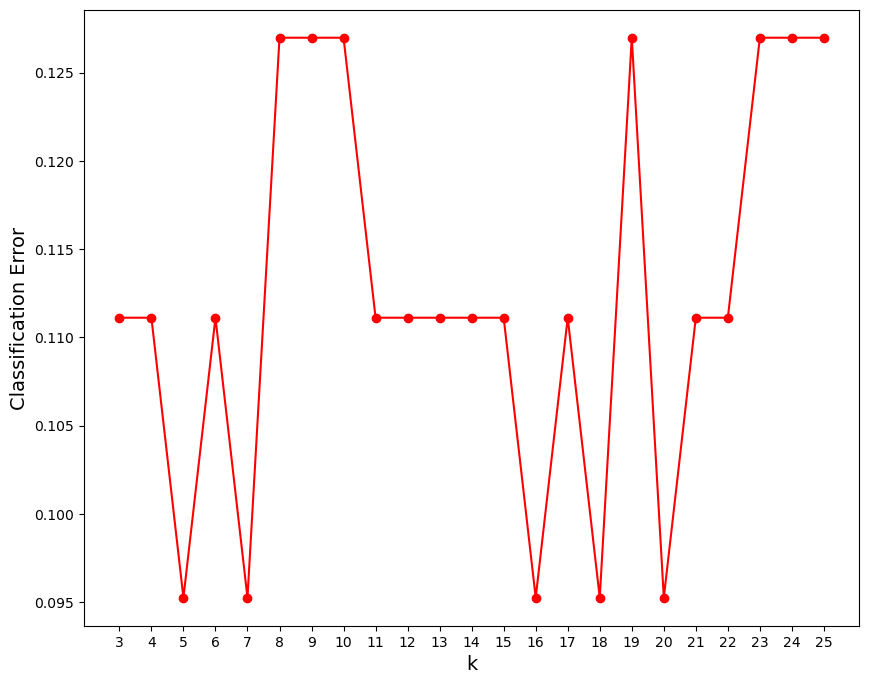

In [27]:
plt.figure(figsize = (10, 8))
plt.plot(possible_k, errors, color = 'red', marker = "o")
plt.xlabel('k', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.xticks(possible_k)
plt.show()

### Discussion

There is not a good method for determining the optimal k, even testing many different k's to comapre their classification error give inconclusive results as seen in the image above. Many k-values will give good results, and it ends up being more of a descion about how we want the model to behave, not what k is the absolute best. A small k can allow for more intricate classification baoundaries, which might be necessary if the dataset is actually that complicated as a large k-value would swallow up smaller outposts into the larger blob. However, this also makes it more prone to overfitting, susceptible to outliers, and less robust overall. A large k-value smooths the boundaries between groups, making the classifications more cohesive instead of scattered about. In general, we like more robust solutions so a large k-value tends to be better, but we must remember this comes at the cost of losing some level of detail. 